# Group Presentation 1

## Group 4 Members

* Shyam Akhil Nekkanti - 8982123
* Jun He (Helena) - 8903073
* Zheming Li (Brendan) - 8914152

## Challenge 3

### Dataset Description

The dataset contains information about trending YouTube videos across different countries, including the US, Canada, Germany, and others. It includes various attributes such as video title, channel title, publication date, trending date, views, likes, dislikes, comments, and tags.  It also has categorical data like video category and whether the video includes a thumbnail.

The dataset allow us to explore patterns in video performance and understand what factors may contribute to a video becoming trending, such as engagement metrics or metadata.


## Challenge 4

### Define classes and methods

In [337]:
import pandas as pd
import json


def load_json(file_path):
  """
  Load JSON data from a file
  :param file_path: path to the JSON file
  :return: JSON data
  """

  with open(file_path, 'r') as file:
    data = json.load(file)
  return data


def convert_raw_categories_to_dict(raw_categories):
  """
  Convert raw categories data to a dictionary
  :param raw_categories: raw categories data
  :return: categories dictionary
  """

  categories_dict = {}

  for item in raw_categories['items']:
    categories_dict[int(item['id'])] = item['snippet']['title']

  return categories_dict


class VideoAnalysis:
  """
  A class to explore the YouTube trending videos dataset
  """
  
  def __init__(self, file_path):
    self.df = pd.read_csv(file_path)

  # Method to explore the dataset
  def explore_data(self):
    """
    Explore the dataset by displaying column names and summary statistics
    :return: None
    """

    print("Column Names:", self.df.columns)
    print("Dataset Summary:\n", self.df.describe())

In [338]:
# Create an instance of the class
file_path = 'youtube-dataset/USvideos.csv'
video_analysis = VideoAnalysis(file_path)

# Call the method to explore the dataset
video_analysis.explore_data()

Column Names: Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
Dataset Summary:
         category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+0

### Load the dataset

In [339]:
# Read category data from json
categories = load_json('./youtube-dataset/US_category_id.json')

# Convert categories json data to a hashmap so we can query category information by their ids
categoriesMap = convert_raw_categories_to_dict(categories)

print("Categories Dictionary:\n")
categoriesMap

Categories Dictionary:



{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [340]:
# Read data from CSV
df = pd.read_csv('youtube-dataset/USvideos.csv')

df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


## Challenge 5


### Summary of the use case

This project uses the YouTube trending videos dataset to build a machine learning model that predicts whether a video will trend based on features like views, likes, comments, and video metadata. The use case is to help content creators optimize their video attributes to increase their chances of appearing in the trending list.

### Mean & Median

We calculate the mean and median of `views` because `views` are directly tied to YouTuber income. These metrics help creators better understand and predict their potential earnings.

In [341]:
## calculate the mean and median of views
mean_views = df['views'].mean()
median_views = df['views'].median()

print(f"Mean Views: {mean_views}")
print(f"Median Views: {median_views}")

Mean Views: 2360784.6382573447
Median Views: 681861.0


### Mode

We chose to calculate the mode for `category_id` because `category_id` represents video categories (such as entertainment, technology, sports, etc.). The mode of this feature can indicate which category of videos is most likely to trend.

In [342]:
## calculate the mode of category_id
mode_category_id = df['category_id'].mode()[0]
most_common_category = categoriesMap[mode_category_id]

print(f"Mode of Category: {most_common_category} (category_id = {mode_category_id})")

Mode of Category: Entertainment (category_id = 24)


## Challenge 6

### Variance & Standard Deviation

We calculate variance and standard deviation for views to measure how much the view counts deviate from the average. This helps understand the level of fluctuation in video popularity.

In [343]:
variance_views = df['views'].var()
print(f"Variance of Views: {variance_views}")

std_dev_views = df['views'].std()
print(f"Standard Deviation of Views: {std_dev_views}")

Variance of Views: 54672918291443.22
Standard Deviation of Views: 7394113.759703945


### Four Quartiles

We use four quartiles for likes to divide the data into segments, providing insights into how different videos perform in terms of user engagement. Quartiles help show the range from the least liked to the most liked videos.

In [367]:
quartiles = df['likes'].quantile([0.25, 0.5, 0.75, 1.0])

print("Four Quartiles of Likes:\n")
print(f"Q1 (25%): {quartiles[0.25]}")
print(f"Q2 (50%, Median): {quartiles[0.5]}")
print(f"Q3 (75%): {quartiles[0.75]}")
print(f"Q4 (100% - Max): {quartiles[1.0]}")

Four Quartiles of Likes:

Q1 (25%): 5424.0
Q2 (50%, Median): 18091.0
Q3 (75%): 55417.0
Q4 (100% - Max): 5613827.0


## Challenge 7

### Scatter Plot

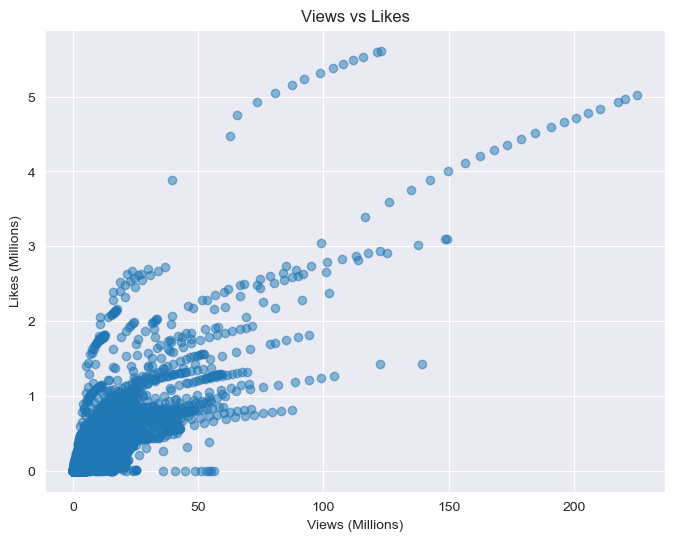

In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2  # For Venn diagrams

# display a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['views'] / 1_000_000, df['likes'] / 1_000_000, alpha=0.5)
plt.title('Views vs Likes')
plt.xlabel('Views (Millions)')
plt.ylabel('Likes (Millions)')
plt.show()

### Histogram

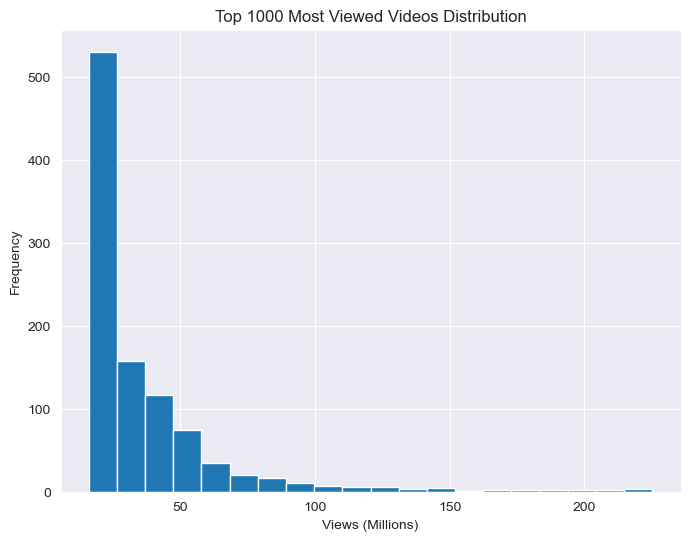

In [346]:
# display a histogram for views
top_1k_views = df.sort_values(by='views', ascending=False).head(1000)

plt.figure(figsize=(8, 6))
plt.hist(top_1k_views['views'] / 1_000_000, bins=20)
plt.title('Top 1000 Most Viewed Videos Distribution')
plt.xlabel('Views (Millions)')
plt.ylabel('Frequency')
plt.show()

### Box-Whisker Plot

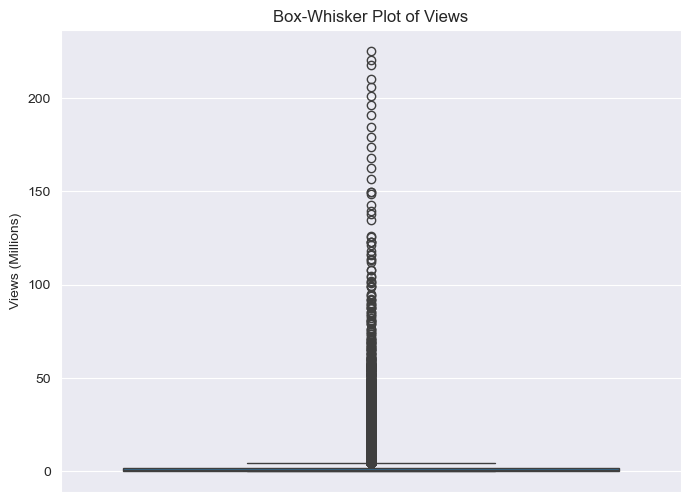

In [347]:
## display a box-whisker plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['views'] / 1_000_000)
plt.title('Box-Whisker Plot of Views')
plt.ylabel('Views (Millions)')
plt.show()

### Venn Diagram

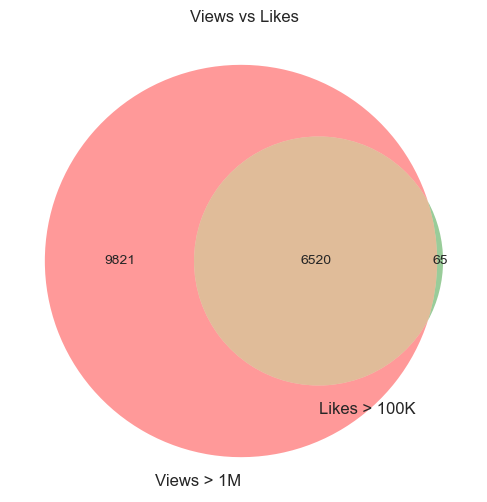

In [348]:
## display a Venn Diagram for two groups: Views > 1M and Likes > 100K
views_set = set(df[df['views'] > 1_000_000].index)
likes_set = set(df[df['likes'] > 100_000].index)
plt.figure(figsize=(8, 6))
venn2((views_set, likes_set), set_labels=('Views > 1M', 'Likes > 100K'))
plt.title('Views vs Likes')
plt.show()

### Numerical summary of the data

In [349]:
most_common_category = categoriesMap[mode_category_id]
summary = pd.DataFrame({
  'Metric': [
    'Total Videos',
    'Average Views',
    'Median Views',
    'Average Likes',
    'Median Likes',
    'Average Comments',
    'Median Comments',
    'Most Common Category'
  ],
  'Value': [
    len(df),
    f"{df['views'].mean():,.0f}",
    f"{df['views'].median():,.0f}",
    f"{df['likes'].mean():,.0f}",
    f"{df['likes'].median():,.0f}",
    f"{df['comment_count'].mean():,.0f}",
    f"{df['comment_count'].median():,.0f}",
    f"{most_common_category}"
  ]
})

print("Numerical Summary of Data:")
print(summary.to_string(index=False))

Numerical Summary of Data:
              Metric         Value
        Total Videos         40949
       Average Views     2,360,785
        Median Views       681,861
       Average Likes        74,267
        Median Likes        18,091
    Average Comments         8,447
     Median Comments         1,856
Most Common Category Entertainment
